In [4]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

matplotlib.rcParams.update({'font.size':18,
                            'figure.facecolor': (1,1,1,1)})
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)

In [5]:
df = pd.read_csv("Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.count()

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [7]:
df = df.dropna()
df.count()

Item_Identifier              4650
Item_Weight                  4650
Item_Fat_Content             4650
Item_Visibility              4650
Item_Type                    4650
Item_MRP                     4650
Outlet_Identifier            4650
Outlet_Establishment_Year    4650
Outlet_Size                  4650
Outlet_Location_Type         4650
Outlet_Type                  4650
Item_Outlet_Sales            4650
dtype: int64

In [8]:
df.groupby("Item_Type")["Item_Outlet_Sales"].sum() 

Item_Type
Baking Goods             7.184262e+05
Breads                   3.154407e+05
Breakfast                1.277837e+05
Canned                   7.960811e+05
Dairy                    8.882198e+05
Frozen Foods             1.059900e+06
Fruits and Vegetables    1.549511e+06
Hard Drinks              2.612932e+05
Health and Hygiene       5.922457e+05
Household                1.188504e+06
Meat                     4.972714e+05
Others                   1.996714e+05
Seafood                  9.181382e+04
Snack Foods              1.568592e+06
Soft Drinks              4.941315e+05
Starchy Foods            2.160887e+05
Name: Item_Outlet_Sales, dtype: float64

In [9]:
df.groupby("Item_Type")["Item_Outlet_Sales"].mean()

Item_Type
Baking Goods             2046.798187
Breads                   2389.702474
Breakfast                2203.166638
Canned                   2205.210750
Dairy                    2337.420556
Frozen Foods             2222.011887
Fruits and Vegetables    2312.703005
Hard Drinks              2233.275299
Health and Hygiene       2138.071282
Household                2386.554752
Meat                     2250.096708
Others                   2194.191457
Seafood                  2782.236970
Snack Foods              2391.146609
Soft Drinks              2050.338007
Starchy Foods            2483.778379
Name: Item_Outlet_Sales, dtype: float64

In [10]:
df.groupby("Item_Type")["Item_Outlet_Sales"].max()

Item_Type
Baking Goods              7931.6754
Breads                    6972.2576
Breakfast                 6930.9780
Canned                    7590.1200
Dairy                    10256.6490
Frozen Foods              7370.4060
Fruits and Vegetables     7549.5062
Hard Drinks               7843.1240
Health and Hygiene        9779.9362
Household                 7240.5750
Meat                      6729.9064
Others                    6008.8450
Seafood                   6503.5344
Snack Foods               9069.5276
Soft Drinks               7017.5320
Starchy Foods             8132.0812
Name: Item_Outlet_Sales, dtype: float64

In [11]:
df.groupby(["Outlet_Size","Item_Type"])["Item_Outlet_Sales"].sum()

Outlet_Size  Item_Type            
High         Baking Goods             149715.7828
             Breads                    52018.2882
             Breakfast                 27355.7246
             Canned                   143732.2382
             Dairy                    196254.5370
             Frozen Foods             203696.8494
             Fruits and Vegetables    341526.7706
             Hard Drinks               54362.5700
             Health and Hygiene       119135.5888
             Household                248046.4532
             Meat                      95200.0788
             Others                    35238.1308
             Seafood                    8146.7288
             Snack Foods              309246.1234
             Soft Drinks              115234.6666
             Starchy Foods             43753.0470
Medium       Baking Goods             260328.4658
             Breads                   115095.5144
             Breakfast                 52710.7202
             Ca

In [12]:
df_sales_of_item_type_by_outSize_mean = pd.DataFrame(df.groupby(["Outlet_Size","Item_Type"])["Item_Outlet_Sales"].mean())

In [13]:
df_sales_of_item_type_by_outSize_mean.loc[("High"),:]

,Item_Outlet_Sales
Item_Type,
Baking Goods,2050.901134
Breads,2080.731528
Breakfast,2104.286508
Canned,2211.265203
Dairy,2453.181713
Frozen Foods,2214.096189
Fruits and Vegetables,2405.118103
Hard Drinks,2363.590000
Health and Hygiene,1953.042439


<AxesSubplot:xlabel='Item_Type'>

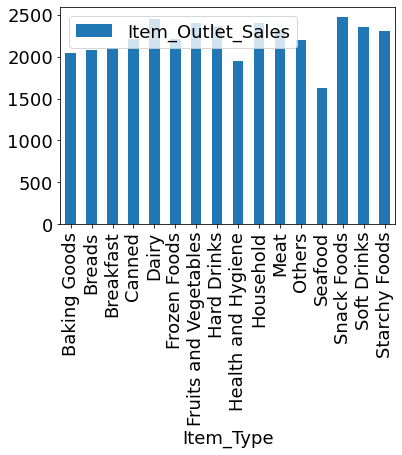

In [14]:
# making a bar graph
df_sales_of_item_type_by_outSize_mean.loc[("High"),:].plot(kind="bar")

In [15]:
df_top_5 = df_sales_of_item_type_by_outSize_mean.loc[("High"),:].sort_values("Item_Outlet_Sales",ascending=False)[0:5]
df_top_5.head()

,Item_Outlet_Sales
Item_Type,
Snack Foods,2473.968987
Dairy,2453.181713
Household,2408.217992
Fruits and Vegetables,2405.118103
Hard Drinks,2363.590000


In [16]:
cat = list(df_top_5.index)
vals =df_top_5['Item_Outlet_Sales'].values
cat,vals

(['Snack Foods', 'Dairy', 'Household', 'Fruits and Vegetables', 'Hard Drinks'],
 array([2473.9689872 , 2453.1817125 , 2408.21799223, 2405.11810282,
        2363.59      ]))

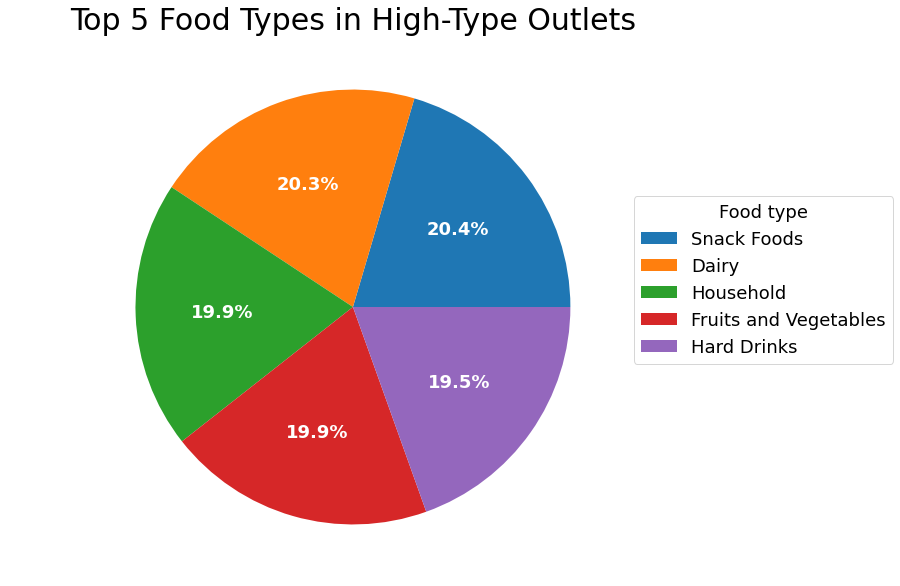

In [27]:

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

explode = [0 for i in vals]
wedges, texts, _ = ax.pie(vals,labels=cat,
                         explode=explode, 
                         autopct='%1.1f%%',
                         shadow=False, 
                         startangle=0,
                         textprops={'color':'w',
                                   'fontweight':'bold'})

texts.clear()
ax.legend(wedges, cat,
          title="Food type",
          loc="center left", # make the center of the left edge of the legend box
          bbox_to_anchor=(1, 0.55)) # and place it at 100% position of the figures width, and 55% position of the figure's height
          # Think of bbox_to_anchor as an x,y coordinate of the loc

ax.set_title("Top 5 Food Types in High-Type Outlets",fontdict={'fontsize':30})

plt.show()